# PROJET 3 : Concevez une application au service de la santé publique
## NOTE BOOK D'EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from math import sqrt

from scipy.stats import chi2_contingency
from scipy.stats import chi2

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Circle


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


### Chargement des données

In [2]:
df_cleaned = pd.read_csv('en.openfoodfacts.org.products_cleaned.csv',sep=',')

## 1. Analyse Univariée

### 1.1. Distribution des variables numériques

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


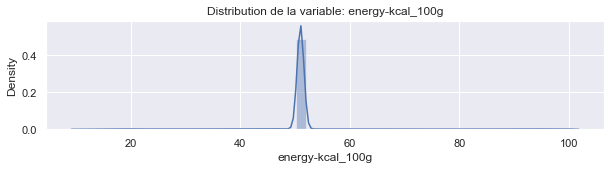

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


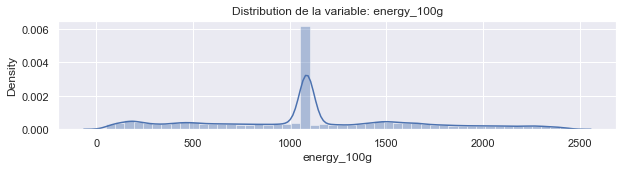

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


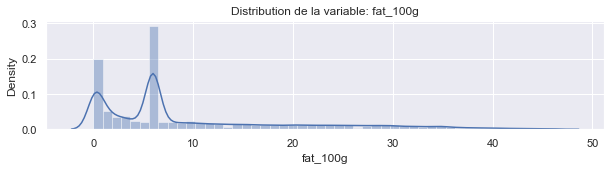

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


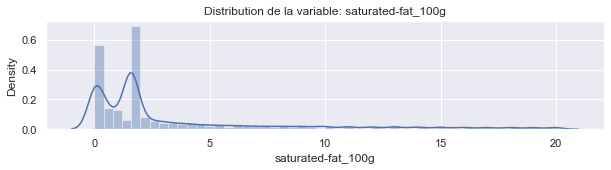

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


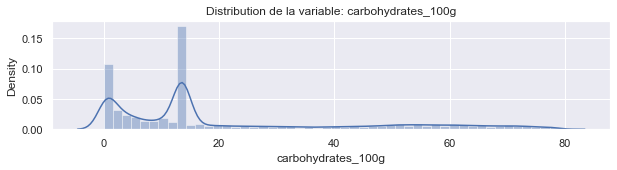

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


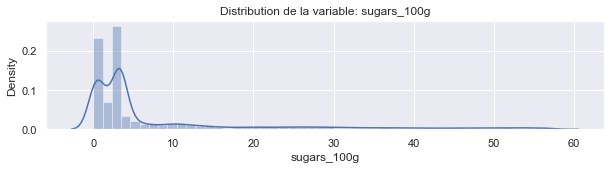

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


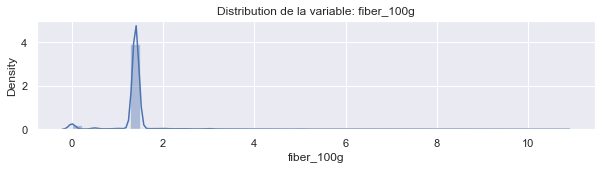

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


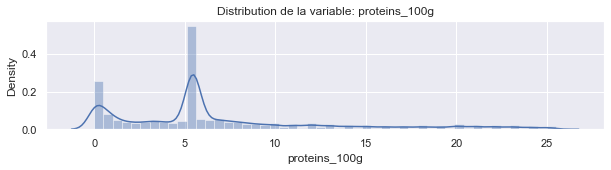

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


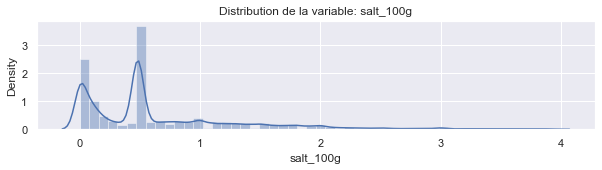

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


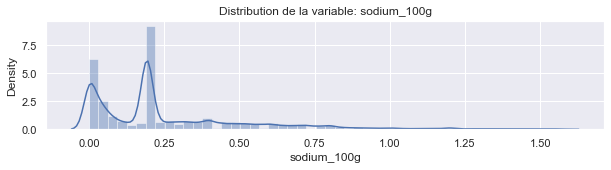

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


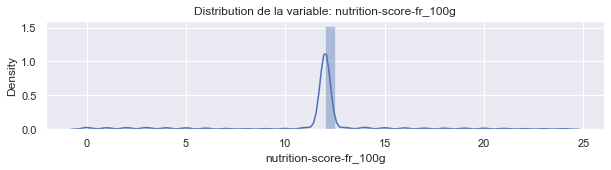

In [3]:
numeric_columns = df_cleaned.select_dtypes(include = ['int32','float64']).columns
for column in numeric_columns:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(df_cleaned[column], bins=50)
    chaine = 'Distribution de la variable: ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

### 1.2. Test de normalité des variables

### 1) test de normalité d'Agostino & Pearson

In [4]:
numeric_columns = df_cleaned.select_dtypes(include = ['int32','float64']).columns
numeric_columns = numeric_columns[1:]
for column in numeric_columns:
    print('________\n{}'.format(column))
    k2, p = stats.normaltest(df_cleaned[column], 
                             axis=0,
                             nan_policy = 'omit')
    alpha = 5e-2
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothese: x a une distribution normale
        print("H0 est rejetée : {} n'a pas une distribution qui suit la loi normale".format(column))
    else:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))

________
energy_100g
p = 0
H0 est rejetée : energy_100g n'a pas une distribution qui suit la loi normale
________
fat_100g
p = 0
H0 est rejetée : fat_100g n'a pas une distribution qui suit la loi normale
________
saturated-fat_100g
p = 0
H0 est rejetée : saturated-fat_100g n'a pas une distribution qui suit la loi normale
________
carbohydrates_100g
p = 0
H0 est rejetée : carbohydrates_100g n'a pas une distribution qui suit la loi normale
________
sugars_100g
p = 0
H0 est rejetée : sugars_100g n'a pas une distribution qui suit la loi normale
________
fiber_100g
p = 0
H0 est rejetée : fiber_100g n'a pas une distribution qui suit la loi normale
________
proteins_100g
p = 0
H0 est rejetée : proteins_100g n'a pas une distribution qui suit la loi normale
________
salt_100g
p = 0
H0 est rejetée : salt_100g n'a pas une distribution qui suit la loi normale
________
sodium_100g
p = 0
H0 est rejetée : sodium_100g n'a pas une distribution qui suit la loi normale
________
nutrition-score-fr_100g
p 

### 2) Test de normalité Kolmogorov Smirnov

In [5]:
numeric_columns = df_cleaned.select_dtypes(include = ['int32','float64']).columns
numeric_columns = numeric_columns[1:]

for column in numeric_columns:
    print('________\n{}'.format(column))
    D, p = stats.kstest(df_cleaned[column].dropna(), 
                     'norm', 
                     args=(df_cleaned[column].mean(), df_cleaned[column].std()))
    alpha = 5e-2
    print("p = {}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("L'hypothèse nulle peut être rejetée : {} n'a pas une distribution qui suit la loi normale".format(column))
    else:
        print("L'hypothèse nulle peut être rejetée")

________
energy_100g
p = 0.0
L'hypothèse nulle peut être rejetée : energy_100g n'a pas une distribution qui suit la loi normale
________
fat_100g
p = 0.0
L'hypothèse nulle peut être rejetée : fat_100g n'a pas une distribution qui suit la loi normale
________
saturated-fat_100g
p = 0.0
L'hypothèse nulle peut être rejetée : saturated-fat_100g n'a pas une distribution qui suit la loi normale
________
carbohydrates_100g
p = 0.0
L'hypothèse nulle peut être rejetée : carbohydrates_100g n'a pas une distribution qui suit la loi normale
________
sugars_100g
p = 0.0
L'hypothèse nulle peut être rejetée : sugars_100g n'a pas une distribution qui suit la loi normale
________
fiber_100g
p = 0.0
L'hypothèse nulle peut être rejetée : fiber_100g n'a pas une distribution qui suit la loi normale
________
proteins_100g
p = 0.0
L'hypothèse nulle peut être rejetée : proteins_100g n'a pas une distribution qui suit la loi normale
________
salt_100g
p = 0.0
L'hypothèse nulle peut être rejetée : salt_100g n'a p

In [9]:
#for column in categorical_variables:
#    sns.countplot(x = df_cleaned[column], data = df_cleaned)
#    plt.title(column)
#    plt.show()
#    print('')

### 1.3. Variables catégorielles

#### La variable countries

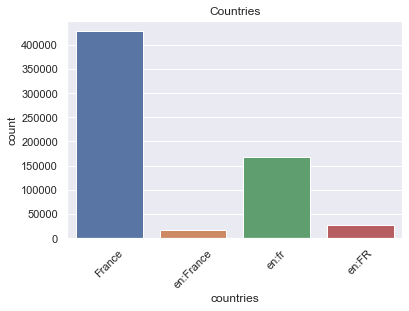

In [10]:
sns.countplot(x = df_cleaned['countries'], data = df_cleaned)
plt.title('Countries')
plt.xticks(rotation=45)
plt.show()
print('')

#### La variable nutriscore_grade

Text(0.5, 1.0, 'Répartition des Nutriscores')

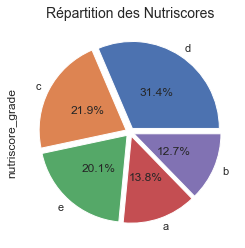

In [6]:
grade = df_cleaned['nutriscore_grade'].value_counts()
pie, ax = plt.subplots(figsize=[8,4])
grade.plot.pie(autopct="%.1f%%",explode=[0.05]*5, pctdistance=0.5)
plt.title("Répartition des Nutriscores", fontsize=14)


#### La variable categories

In [12]:
print('La variable categories compte {} catégories uniques de produits'.format(df_cleaned.categories.nunique()))

La variable categories compte 45436 catégories uniques de produits


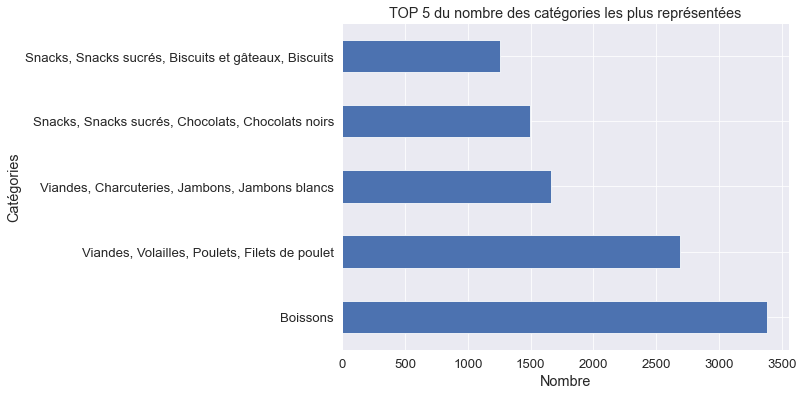

In [68]:
Figure = df_cleaned.groupby(by='categories')['product_name'].agg('count').sort_values(ascending=False).head()
Figure.plot(kind='barh', figsize=(8,6), title = 'TOP 5 du nombre des catégories les plus représentées')
plt.xlabel("Nombre")
plt.ylabel("Catégories")
plt.show()

#### La variable product_name

In [14]:
print('La variable product_name compte {} noms de produits'.format(df_cleaned.product_name.nunique()))

La variable product_name compte 421852 noms de produits


Text(0, 0.5, 'Produits')

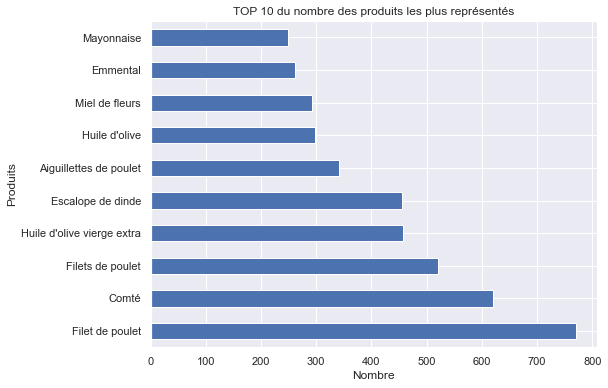

In [15]:
Figure2 = df_cleaned.groupby(by='product_name')['categories'].agg('count').sort_values(ascending=False).head(10)
Figure2.plot(kind='barh', figsize=(8,6), title = 'TOP 10 du nombre des produits les plus représentés')
plt.xlabel("Nombre")
plt.ylabel("Produits")

### 2. Analyse bivariée

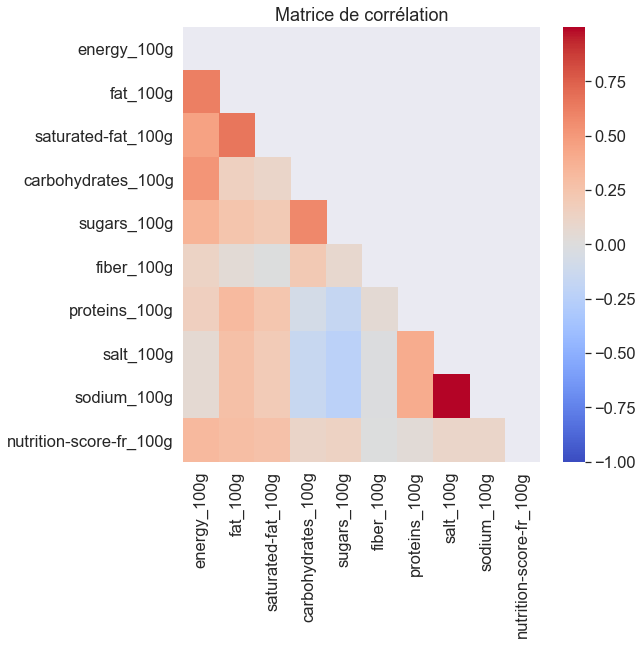

In [16]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation')

corr = df_cleaned[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)


### Test d'indépendance des variables numériques

In [17]:
def test_chi2(serie1, serie2):
    
    alpha = 0.03    
    
    #H0 : les variables sont indépendantes
    
    #print('tableau de contingence :\n', pd.crosstab(serie1.array, serie2.array))
    tab_contingence = pd.crosstab(serie1.array, serie2.array)
    stat_chi2, p, dof, expected_table = chi2_contingency(tab_contingence.values)
    print('chi2 : {0:.5f},\np : {0:.5f},\ndof : {0:.5f}\n'.format(stat_chi2, p, dof))
    #print('tableau de contingence : \n', tab_contingence)
    
    critical = chi2.ppf(1-alpha, dof) #
    #print('critital : ', critical)

    if p <= alpha:
        print('Variables non indépendantes (H0 rejetée) car p = {} <= alpha = {}'.format(p, alpha))
        return False
    
    else:
        print('H0 non rejetée car p = {} >= alpha = {}'.format(p, alpha))
        return True

In [18]:
x = pd.cut(df_cleaned['nutrition-score-fr_100g'], 20)
for column in df_cleaned.select_dtypes(include = ['int32','float64']).columns:
    print('test d\'indépendance {} / {}'.format('nutriscore',column))
    if df_cleaned[column].nunique() > 20 :
        y = pd.cut(df_cleaned[column], 20).astype('category')
    else:
        y = df_cleaned[column].astype('category')
    test_chi2(x, y)
    
    print('________________________________________________________________________________________________\n')

test d'indépendance nutriscore / energy-kcal_100g
chi2 : 40402.33200,
p : 40402.33200,
dof : 40402.33200

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
________________________________________________________________________________________________

test d'indépendance nutriscore / energy_100g
chi2 : 167244.70061,
p : 167244.70061,
dof : 167244.70061

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
________________________________________________________________________________________________

test d'indépendance nutriscore / fat_100g
chi2 : 145668.71990,
p : 145668.71990,
dof : 145668.71990

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
________________________________________________________________________________________________

test d'indépendance nutriscore / saturated-fat_100g
chi2 : 144171.89451,
p : 144171.89451,
dof : 144171.89451

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
________

### 3. Analyse multivariée

### PCA

In [19]:
df_cleaned.select_dtypes(['float64','int32']).shape

(639465, 11)

In [20]:
data_pca = df_cleaned.select_dtypes(['float64','int32'])

In [21]:
colonnes_pca = df_cleaned.select_dtypes(['float64','int32']).columns

In [22]:
#on ramène nos données à une moyenne nulle et une variance de 1
scaler = StandardScaler()
data_pca = scaler.fit_transform(data_pca)

In [23]:
pca = PCA(n_components = data_pca.shape[1])

In [24]:
pca.fit(data_pca)

PCA(n_components=11)

In [25]:
pca.explained_variance_ratio_

array([2.69712376e-01, 2.24307169e-01, 1.02987593e-01, 9.10849715e-02,
       8.13896382e-02, 7.47134301e-02, 5.86252692e-02, 4.54737959e-02,
       3.25795812e-02, 1.91247563e-02, 1.41988356e-06])

In [26]:
pca.singular_values_

array([1377.38443106, 1256.10605465,  851.13252211,  800.43873259,
        756.63999049,  724.94334917,  642.16577734,  565.56866077,
        478.71549041,  366.77750066,    3.16032028])

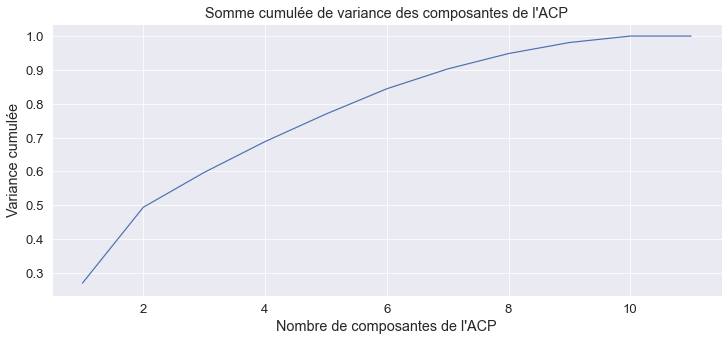

In [69]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(np.linspace(1, 11,11),
         np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [28]:
pca.components_.shape


(11, 11)

In [29]:
# En retenant les 2 composantes les plus significatives on obtient le plan factoriel suivant :

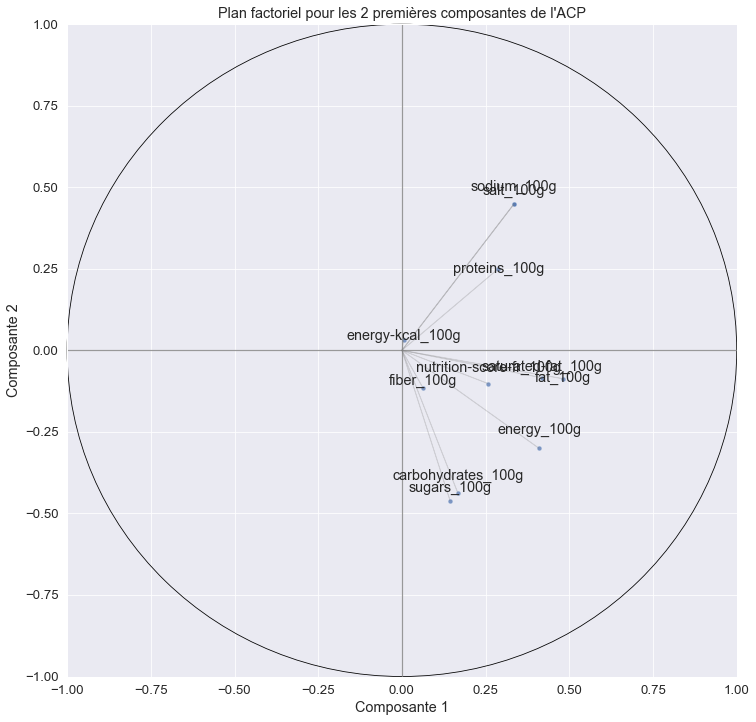

In [30]:
sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(12,12))
chaine = "Plan factoriel pour les 2 premières composantes de l'ACP"
plt.title(chaine)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1)

plt.show()

In [31]:
norms = np.linalg.norm(pca.components_[0:6], axis=0)

In [32]:
norms

array([0.99253293, 0.51008829, 0.58659059, 0.61003488, 0.69898379,
       0.63976647, 0.95097154, 0.61428489, 0.69367258, 0.69367117,
       0.94684933])

In [33]:
normes = pd.DataFrame(norms).T

In [34]:
normes.columns = colonnes_pca

In [35]:
normes = normes.T.reset_index()

In [36]:
normes.columns = ['feature', 'norme']
normes.sort_values(by='norme', inplace=True, ascending=False)

<AxesSubplot:title={'center':"Importance relative des features dans \n les composantes de l'ACP"}, xlabel='norme', ylabel='feature'>

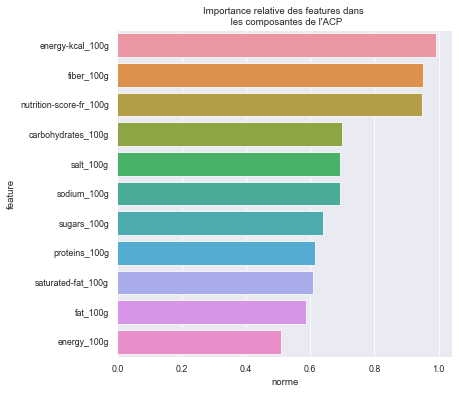

In [37]:
plt.figure(figsize=(6,6))
plt.title('Importance relative des features dans \n les composantes de l\'ACP')
sns.barplot(y = normes['feature'],
            x = normes['norme'])

### 4. Prédiction nutri-score

In [47]:
df_cleaned.columns

Index(['product_name', 'categories', 'countries', 'nutriscore_grade',
       'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [48]:
# suppression des variables non utiles pour la prédiction du nutri-score ainsi que celles qui sont fortement corrélées
data = df_cleaned.drop(['product_name','categories','countries','sodium_100g','nutriscore_grade'], axis=1)

In [49]:
print(f'Nombre de données manquantes dans la dataset :{data.isna().sum().sum()}')

Nombre de données manquantes dans la dataset :0


In [50]:
data.shape

(639465, 10)

In [51]:
# Définition le jeu de données d'entrainement et de test : 

y = data['nutrition-score-fr_100g']
X = data.drop(['nutrition-score-fr_100g'],axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [52]:
params = {'n_estimators': [50],'verbose' : [1]}

rfr = GridSearchCV(RandomForestRegressor(), params, cv = 5)

In [53]:
rfr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50], 'verbose': [1]})

In [54]:
resultat = pd.DataFrame({'nutriscore_reel' : y_test, 'prediction' : rfr.predict(X_test)}).reset_index()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.8s finished


In [55]:
print('R² sur jeu d\'entraînement : ', rfr.best_estimator_.score(X_train,y_train))
print('R² sur jeu de test', rfr.best_estimator_.score(X_test,y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R² sur jeu d'entraînement :  0.8521397233112588
R² sur jeu de test 0.46730212256262693


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.9s finished


In [56]:
print('RMSE = ', sqrt(mean_squared_error(y_test, rfr.best_estimator_.predict(X_test))))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE =  2.70961166864834


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.8s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.0s finished
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':"Données Test -Distributions de l'écart réel/prédictions"}, xlabel='nutrition-score-fr_100g', ylabel='Density'>

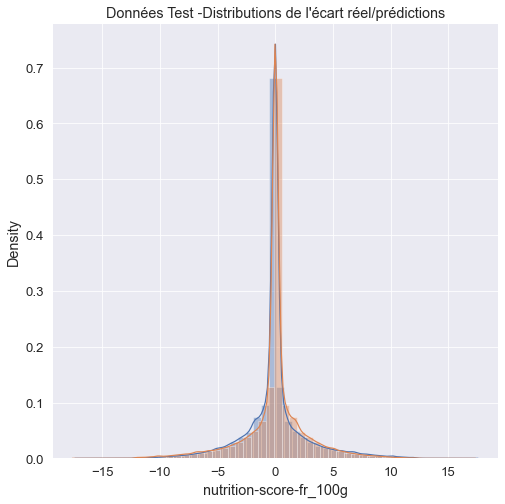

In [57]:
plt.figure(figsize=(8,8))
plt.title('Données Test -Distributions de l\'écart réel/prédictions')
sns.distplot(rfr.predict(X_test) -  y_test)
sns.distplot(resultat['nutriscore_reel'] - resultat['prediction'])


In [58]:
resultat

,index,nutriscore_reel,prediction
0,113341,14.0,13.411299
1,440376,12.0,12.000000
2,407248,3.0,5.787000
3,60375,12.0,11.978068
4,328800,18.0,12.000000
...,...,...,...
191835,474758,12.0,11.978068
191836,172145,12.0,12.520000
191837,299229,18.0,15.290000
191838,163906,23.0,14.626119
